In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.colors as pc
import warnings
warnings.filterwarnings('ignore')

In [148]:
from google.colab import files
uploaded = files.upload()

Saving pizza_sales.csv to pizza_sales (3).csv


In [149]:
df = pd.read_csv('pizza_sales.csv', encoding='latin1')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [150]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [151]:
df.shape

(48620, 12)

In [152]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [153]:
df.head(2)

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza


In [154]:
df.columns = df.columns.str.strip()
df.columns = df.columns.str.title()

In [155]:
df.dtypes

,0
Pizza_Id,int64
Order_Id,int64
Pizza_Name_Id,object
Quantity,int64
Order_Date,object
Order_Time,object
Unit_Price,float64
Total_Price,float64
Pizza_Size,object
Pizza_Category,object


In [156]:
df.describe()

,Pizza_Id,Order_Id,Quantity,Unit_Price,Total_Price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [157]:
df.describe()

,Pizza_Id,Order_Id,Quantity,Unit_Price,Total_Price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [158]:
df.describe(include= 'object')

,Pizza_Name_Id,Order_Date,Order_Time,Pizza_Size,Pizza_Category,Pizza_Ingredients,Pizza_Name
count,48620,48620,48620,48620,48620,48620,48620
unique,91,358,16382,5,4,32,32
top,big_meat_s,26-11-2015,12:32:00,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,1811,261,26,18526,14579,2416,2416


In [159]:
df.describe(include= 'all')

,Pizza_Id,Order_Id,Pizza_Name_Id,Quantity,Order_Date,Order_Time,Unit_Price,Total_Price,Pizza_Size,Pizza_Category,Pizza_Ingredients,Pizza_Name
count,48620.000000,48620.000000,48620,48620.000000,48620,48620,48620.000000,48620.000000,48620,48620,48620,48620
unique,NaN,NaN,91,NaN,358,16382,NaN,NaN,5,4,32,32
top,NaN,NaN,big_meat_s,NaN,26-11-2015,12:32:00,NaN,NaN,L,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
freq,NaN,NaN,1811,NaN,261,26,NaN,NaN,18526,14579,2416,2416
mean,24310.500000,10701.479761,NaN,1.019622,NaN,NaN,16.494132,16.821474,NaN,NaN,NaN,NaN
std,14035.529381,6180.119770,NaN,0.143077,NaN,NaN,3.621789,4.437398,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,1.000000,NaN,NaN,9.750000,9.750000,NaN,NaN,NaN,NaN
25%,12155.750000,5337.000000,NaN,1.000000,NaN,NaN,12.750000,12.750000,NaN,NaN,NaN,NaN
50%,24310.500000,10682.500000,NaN,1.000000,NaN,NaN,16.500000,16.500000,NaN,NaN,NaN,NaN
75%,36465.250000,16100.000000,NaN,1.000000,NaN,NaN,20.250000,20.500000,NaN,NaN,NaN,NaN


#### **Data Cleaning**

In [160]:
df.duplicated().sum()

np.int64(0)

In [161]:
df.isnull().sum()

,0
Pizza_Id,0
Order_Id,0
Pizza_Name_Id,0
Quantity,0
Order_Date,0
Order_Time,0
Unit_Price,0
Total_Price,0
Pizza_Size,0
Pizza_Category,0


In [162]:
df.isnull().sum()/len(df)*100

,0
Pizza_Id,0.0
Order_Id,0.0
Pizza_Name_Id,0.0
Quantity,0.0
Order_Date,0.0
Order_Time,0.0
Unit_Price,0.0
Total_Price,0.0
Pizza_Size,0.0
Pizza_Category,0.0


#### **KPI's**
. Total Revenue = Sum of total_price

• Total Pizzas Sold = Sum of quantity

• Total Orders = Count of unique order_id

• Average Order Value (AOV) = Total Revenue ÷ Total Orders

• Average Pizza per Order = Total Pizzas Sold ÷ Total Orders

In [163]:
Total_Revenue = df['Total_Price'].sum()
Total_Pizzas_Sold = df['Quantity'].sum()
total_Orders  = df['Order_Id'].nunique()
Average_Order_Value = Total_Revenue/total_Orders
Average_Pizza_per_Order = Total_Pizzas_Sold/total_Orders


print(f"Total Revenue is: ${Total_Revenue}")
print(f"Total_Pizzas_Sold is: {Total_Pizzas_Sold}")
print(f"total_Orders is: {total_Orders}")
print(f"Average_Order_Value: ${Average_Order_Value}")
print(f"Average_Pizza_per_Order: {Average_Pizza_per_Order}")

Total Revenue is: $817860.05
Total_Pizzas_Sold is: 49574
total_Orders is: 21350
Average_Order_Value: $38.30726229508197
Average_Pizza_per_Order: 2.321967213114754


#### **Chart's**

Ingredient Analysis

In [164]:
ingredients = (

               df['Pizza_Ingredients']
               .str.split(',')
               .explode()
               .str.strip()
               .value_counts()
               .reset_index()
               .rename(columns={'index': 'Counts', 'Pizza_Ingredients': 'Ingredient'})

)
print(ingredients.head(10))

          Ingredient  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trends - Total Orders

In [165]:
df.columns

Index(['Pizza_Id', 'Order_Id', 'Pizza_Name_Id', 'Quantity', 'Order_Date',
       'Order_Time', 'Unit_Price', 'Total_Price', 'Pizza_Size',
       'Pizza_Category', 'Pizza_Ingredients', 'Pizza_Name'],
      dtype='object')

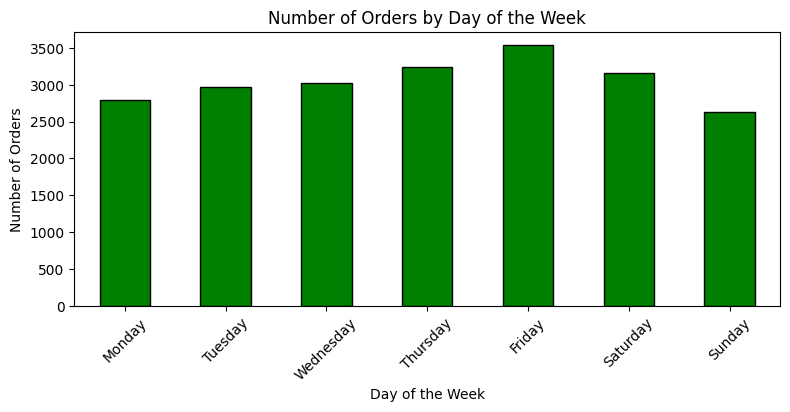

In [166]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst= True)
df['day_name'] = df['Order_Date'].dt.day_name()
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=week_order, ordered=True)
orders_by_day = df.groupby('day_name', observed= False)['Order_Id'].nunique()
ax = orders_by_day.plot(kind='bar', figsize=(8, 4), color = 'green', edgecolor='black')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.tight_layout()
plt.title('Number of Orders by Day of the Week')
plt.show()

### Daily Trends - Total Revenue

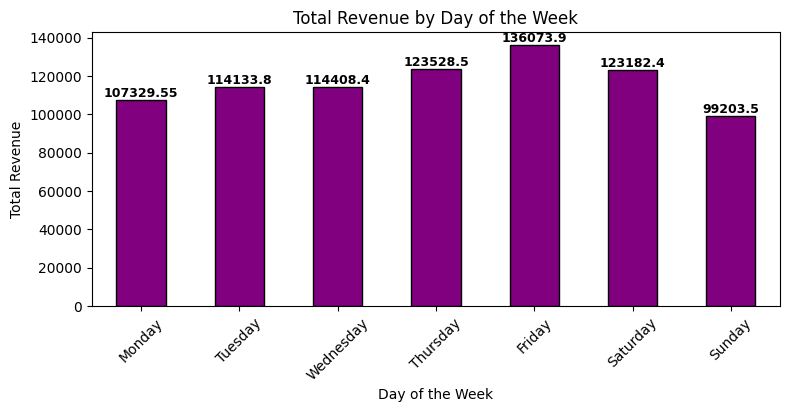

In [167]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst= True)
df['day_name'] = df['Order_Date'].dt.day_name()
week_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['day_name'] = pd.Categorical(df['day_name'], categories=week_order, ordered=True)
orders_by_day = df.groupby('day_name', observed= False)['Total_Price'].sum()
ax = orders_by_day.plot(kind='bar', figsize=(8, 4), color = 'purple', edgecolor='black')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Total Revenue')
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
    plt.text(i, val+20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.title('Total Revenue by Day of the Week')
plt.show()

### Hourly Trends - Total Orders

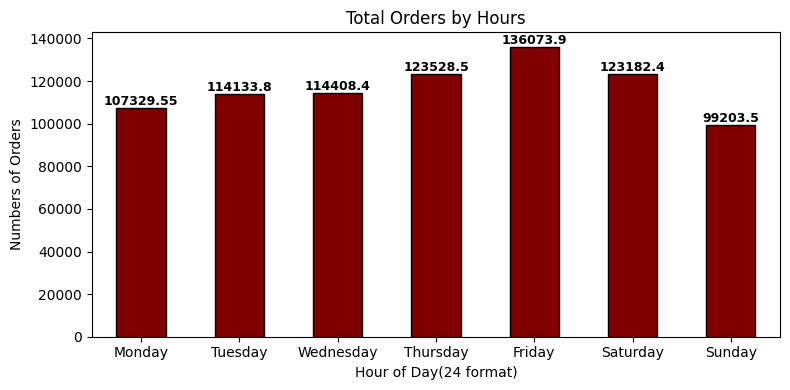

In [168]:
df['Order_Time'] = pd.to_datetime(df['Order_Time'], format = '%H:%M:%S')
df['order_hour'] = df['Order_Time'].dt.hour
orders_by_hour = df.groupby('order_hour', observed= False)['Order_Id'].nunique()
ax = orders_by_day.plot(kind='bar', figsize=(8, 4), color = 'maroon', edgecolor='black')
plt.title('Total Orders by Hours')
ax.set_xlabel('Hour of Day(24 format)')
ax.set_ylabel('Numbers of Orders')
plt.xticks(rotation=0)

for i, val in enumerate(orders_by_day):
    plt.text(i, val+5, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

### Monthly Trends - Total Orders

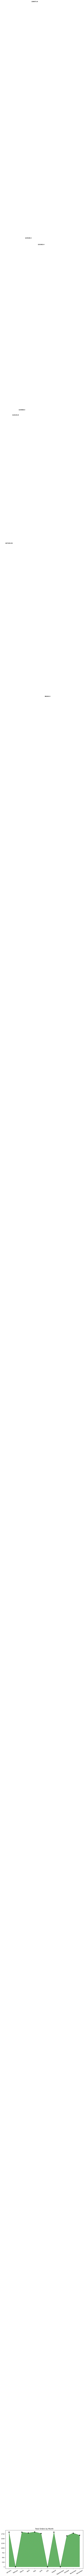

In [169]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], dayfirst= True)
df['month_name'] = df['Order_Date'].dt.month_name()
month_name = ["January", "Febuary", "March", "April", "May", "June", "july", "August", "Sepetember", "October", "November", "December"]
df['month_name'] = pd.Categorical(df['month_name'], categories=month_name, ordered=True)
orders_by_month = df.groupby('month_name', observed= False)['Order_Id'].nunique()

plt.figure(figsize=(10, 5))
plt.fill_between(orders_by_month.index, orders_by_month.values, color='green', alpha=0.6)
plt.plot(orders_by_month.index, orders_by_month.values,color= 'black', linewidth =0.2, marker='o')
plt.title('Total Orders by Month')
ax.set_xlabel('Total Orders by Month')
ax.set_ylabel('Numbers of Orders')
plt.xticks(rotation=30)

for i, val in enumerate(orders_by_day):
    plt.text(i, val+20, str(val), ha='center', va='bottom', fontsize=9, fontweight='bold')
plt.tight_layout()
plt.show()

#### **% Of sales by Category**

In [170]:
category_sales = df.groupby('Pizza_Category')['Total_Price'].sum()
category_sales_percentage = category_sales / category_sales.sum() * 100

# Step 2: Convert Series to DataFrame
category_df = category_sales_percentage.reset_index()
category_df.columns = ['Pizza_Category', 'Percentage']

# Step 3: Create Donut Chart
fig = px.pie(
    category_df,
    values='Percentage',
    names='Pizza_Category',
    title='Category Sales Percentage',
    hole=0.3,

)

# Step 4: Improve appearance
fig.update_traces(
    textposition='inside',
    textinfo='percent+label',
    marker=dict(line=dict(color='black', width=1))
)

fig.show()

#### % Sales by Pizza Size & Category

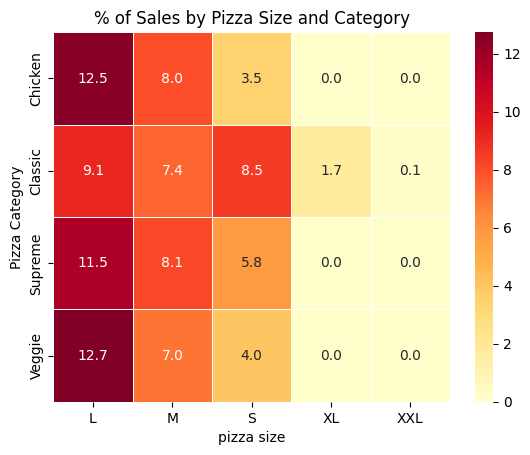

In [171]:
sales_pivot = df.pivot_table(
    index='Pizza_Category',
    columns='Pizza_Size',
    values='Total_Price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = sales_pivot/sales_pivot.sum().sum()*100

plt.title('% of Sales by Pizza Size and Category')
sns.heatmap(sales_pct, annot=True, fmt='.1f', cmap='YlOrRd', linewidth=0.5)
plt.xlabel('pizza size')
plt.ylabel('Pizza Category')
plt.show()

#### Total Pizza Sold by pizza Category

In [172]:
# Step 1: Group Data
pizza_by_category = df.groupby('Pizza_Category')['Quantity'].sum().reset_index()

# Step 2: Create Bar Chart
fig = px.bar(
    pizza_by_category,
    x='Pizza_Category',
    y='Quantity',
    title='Total Pizza Sold by Pizza Category',
    text='Quantity',  # show values on bars
    color='Pizza_Category',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Step 3: Customize Layout
fig.update_layout(
    xaxis_title='Pizza Category',
    yaxis_title='Total Pizza Sold',
    xaxis_tickangle=0
)

# Step 4: Improve Text Position
fig.update_traces(textposition='outside')
fig.show()

#### Top-5 Best-Selling Pizza: Total Quantity




In [173]:
best_selling_pizza = df.groupby('Pizza_Name')['Quantity'].sum().reset_index()
best_selling_pizza = best_selling_pizza.sort_values(by='Quantity', ascending=False).head(5)
best_selling_pizza

# Step 2: Create Bar Chart
fig = px.bar(
    best_selling_pizza,
    x='Pizza_Name',
    y='Quantity',
    title='Top-5 Best-Selling Pizza',
    text='Quantity',  # show values on bars
    color='Pizza_Name',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Step 3: Customize Layout
fig.update_layout(
    xaxis_title='Pizza Category',
    yaxis_title='Total Pizza Sold',
    xaxis_tickangle=0
)

# Step 4: Improve Text Position
fig.update_traces(textposition='outside')
fig.show()

#### Top-5 Best-Selling Pizza: Total Orders



In [174]:
df.head(2)

,Pizza_Id,Order_Id,Pizza_Name_Id,Quantity,Order_Date,Order_Time,Unit_Price,Total_Price,Pizza_Size,Pizza_Category,Pizza_Ingredients,Pizza_Name,day_name,order_hour,month_name
0,1,1,hawaiian_m,1,2015-01-01,1900-01-01 11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,Thursday,11,January
1,2,2,classic_dlx_m,1,2015-01-01,1900-01-01 11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,Thursday,11,January


In [175]:
best_selling_pizza = df.groupby('Pizza_Name')['Order_Id'].sum().reset_index()
best_selling_pizza = best_selling_pizza.sort_values(by='Order_Id', ascending=False).head(5)
best_selling_pizza

# Step 2: Create Bar Chart
fig = px.bar(
    best_selling_pizza,
    x='Pizza_Name',
    y='Order_Id',
    title='Top-5 Best-Selling Pizza: Total Orders',
    text='Order_Id',  # show values on bars
    color='Pizza_Name',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Step 3: Customize Layout
fig.update_layout(
    xaxis_title='Pizza Name',
    yaxis_title='Total Pizza Sold',
    xaxis_tickangle=0
)

# Step 4: Improve Text Position
fig.update_traces(textposition='outside')
fig.show()

#### Top-5 Best-Selling Pizza: Total Sales

In [176]:
best_selling_pizza = df.groupby('Pizza_Name')['Total_Price'].sum().reset_index()
best_selling_pizza = best_selling_pizza.sort_values(by='Total_Price', ascending=False).head(5)
best_selling_pizza

# Step 2: Create Bar Chart
fig = px.bar(
    best_selling_pizza,
    x='Pizza_Name',
    y='Total_Price',
    title='Top-5 Best-Selling Pizza: Total Sales',
    text='Total_Price',  # show values on bars
    color='Pizza_Name',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Step 3: Customize Layout
fig.update_layout(
    xaxis_title='Pizza Name',
    yaxis_title='Total Pizza Sold',
    xaxis_tickangle=0
)

# Step 4: Improve Text Position
fig.update_traces(textposition='outside')
fig.show()

#### Bottom-5 Best-Selling Pizza: Total Sales

In [177]:
best_selling_pizza = df.groupby('Pizza_Name')['Total_Price'].sum().reset_index()
best_selling_pizza = best_selling_pizza.sort_values(by='Total_Price', ascending=True).head(5)
best_selling_pizza

# Step 2: Create Bar Chart
fig = px.bar(
    best_selling_pizza,
    x='Pizza_Name',
    y='Total_Price',
    title='Top-5 Best-Selling Pizza: Total Sales',
    text='Total_Price',  # show values on bars
    color='Pizza_Name',
    color_discrete_sequence=px.colors.qualitative.Set3
)

# Step 3: Customize Layout
fig.update_layout(
    xaxis_title='Pizza Name',
    yaxis_title='Total Pizza Sold',
    xaxis_tickangle=0
)

# Step 4: Improve Text Position
fig.update_traces(textposition='outside')
fig.show()